<a href="https://colab.research.google.com/github/TrinhHoangKhang/AI-mini-project/blob/main/011.%20Gradient%20descent/Very_simple_gradient_descent_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import matplotlib.pyplot as plt

#### Part 1: Use GD to find the minimum of a function
Target function: $f(x, y) = (x-3)^2 + (y+4)^2$

In [28]:
def f(x, y):
  return (x - 3)**2 + (y+4)**2

def grad(x, y):
  deri_x = 2*(x - 3)
  deri_y = 2*(y + 4)
  return [deri_x, deri_y]

def good_enough(x, y, grad):
  if np.linalg.norm(grad(x, y))/2 < 1e-3:
    return True
  return False

def gd(x_init, y_init, grad, eta, iter):
  iter_taken = 0
  for i in range(iter):
    x_new = x_init - eta*grad(x_init, y_init)[0]
    y_new = y_init - eta*grad(x_init, y_init)[1]
    x_init = x_new
    y_init = y_new
    iter_taken += 1
    if good_enough(x_init, y_init, grad):
      break
  return x_init, y_init, iter_taken

In [29]:
x = 100
y = 100
print(f"(x, y) start at ({x}, {y})")
x_final, y_final, iter_taken = gd(x, y, grad, 0.1, 100)
print(f'Final: x = {x_final:.1f}, y = {y_final:.1f}, took: {iter_taken} iters')
print("Close to the right solution of: (3, -4)!!!\n")


x = 10
y = 10
print(f"(x, y) start at ({x}, {y})")
x_final, y_final, iter_taken = gd(x, y, grad, 0.1, 100)
print(f'Final: x = {x_final:.1f}, y = {y_final:.1f}, took: {iter_taken} iters')
print("Close to the right solution of: (3, -4)!!!")

x = 4
y = -5
print(f"(x, y) start at ({x}, {y})")
x_final, y_final, iter_taken = gd(x, y, grad, 0.1, 100)
print(f'Final: x = {x_final:.1f}, y = {y_final:.1f}, took: {iter_taken} iters')
print("Close to the right solution of: (3, -4)!!!")

x = 3.1
y = -4.1
print(f"(x, y) start at ({x}, {y})")
x_final, y_final, iter_taken = gd(x, y, grad, 0.1, 100)
print(f'Final: x = {x_final:.1f}, y = {y_final:.1f}, took: {iter_taken} iters')
print("Close to the right solution of: (3, -4)!!!")

(x, y) start at (100, 100)
Final: x = 3.0, y = -4.0, took: 54 iters
Close to the right solution of: (3, -4)!!!

(x, y) start at (10, 10)
Final: x = 3.0, y = -4.0, took: 44 iters
Close to the right solution of: (3, -4)!!!
(x, y) start at (4, -5)
Final: x = 3.0, y = -4.0, took: 33 iters
Close to the right solution of: (3, -4)!!!
(x, y) start at (3.1, -4.1)
Final: x = 3.0, y = -4.0, took: 23 iters
Close to the right solution of: (3, -4)!!!


#### Part 2: Use GD in the linear regression problem (batch)

In [49]:
# F is the loss function
def f(x, y):
  final = 0
  for point in points:
    final += (x*point[0] + y - point[1])**2
  final /= 2*len(points)
  return final

def grad(x, y):
  deri_x = 0
  deri_y = 0
  for point in points:
    deri_x += point[0] * (x*point[0] + y - point[1])
    deri_y += x*point[0] + y - point[1]
  deri_x /= len(points)
  deri_y /= len(points)
  return (deri_x, deri_y)

def good_enough(x, y, grad):
  if np.linalg.norm(grad(x, y))/2 < 1e-3:
    return True
  return False

def gd(x_init, y_init, eta, grad, iter=100):
  iter_taken = 0
  for i in range(iter):
    x_new = x_init - eta * grad(x_init, y_init)[0]
    y_new = y_init - eta * grad(x_init, y_init)[1]
    x_init = x_new
    y_init = y_new
    iter_taken += 1
    if good_enough(x_init, y_init, grad):
      break
  return x_init, y_init, iter_taken

Final: x = 0.8, y = 0.2, took: 51 iters
Start Loss = 3.3333333333333335
Final Loss = 0.01754835728731589


(-10.0, 10.0)

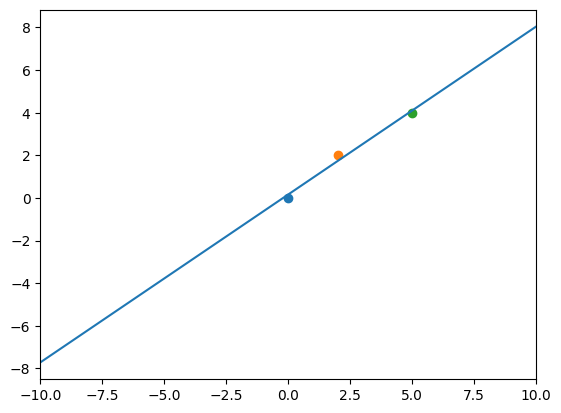

In [51]:
points = [(0, 0), (2, 2), (5, 4)]
x_init, y_init = 0, 0

x_final, y_final, iter_taken = gd(x_init, y_init, 0.1, grad, 100)
print(f'Final: x = {x_final:.1f}, y = {y_final:.1f}, took: {iter_taken} iters')
print(f"Start Loss = {f(x_init, y_init)}")
print(f"Final Loss = {f(x_final, y_final)}")


xs_graph = np.linspace(-10, 10, 100)
ys_graph = [x_final * x_graph + y_final for x_graph in xs_graph]
plt.plot(xs_graph, ys_graph)
for a, b in points:
  plt.scatter(a, b)
plt.xlim(-10, 10)

Fit very well huh